In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture 4: Review of the shallow water equations, pressure gradients, and inertia
Reading: Chapter 3.1

## Nonlinear steepening in the inviscid 1D Burger’s equation.
Approach: Use an upwind advection scheme to integrate the 1D inviscid Burgers' equation, starting from a Gaussian initial condition, and with periodic boundary conditions. 

**Bonus**:

Add a Laplacian viscosity and test the sensitivity of the results to viscosity.

Compare against other advection schemes (e.g. centered difference).

### Burgers' Equation
1d advection-diffusion where diffusion = 0; unsteady advection

\begin{equation}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
\end{equation}

### Explicit (time) + Upwind Advection Scheme (space)
\begin{aligned}
    &\frac{u_i^{n+1} - u_i^n}{\Delta t} + \frac{u}{\Delta x} \left[u_i^n - u_{i-1}^n \right] = 0 \\
    \implies & u_i^{n+1} = (1-c)u_i^n + cu_{i-1}^n
\end{aligned}

where $c=\frac{u\Delta t}{\Delta x}$

### Gaussian initial condition
\begin{equation}
    u(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{equation}

where $\sigma$ and $\sigma^2$ are the mean and standard deviation, respectfully. and $\mu$ is the mean.

In [18]:
# establish Gaussian initial condition
sigma = 1
variance = sigma**2
mu = 0
delta_x = 0.1
x_array = np.arange(-5,5,delta_x)
u_init = 1/(np.sqrt(2 * np.pi * variance)) * np.exp(- (x_array - mu)**2 / 2 * variance)

# establish CFL initial condition
delta_t = 0.1
c = u_init * delta_t / delta_x


In [19]:
u_array = np.expand_dims(u_init,0)
CFL_violations = 0

# n = rows, i = columns... [time, space]

for n in range(0,1000): # time (1 row = 1 timestep)
    u_i_np1_array = np.array([])
    for i in range(0,len(x_array)): # space (1 column = 1 x-space distance)
        # u_i_end = u_array[n-1,-1] PERIODIC BOUNDARY CONDITIONS??
        # u_i_begin = u_i_end
        c = u_array[n,i] * delta_t / delta_x
        if u_array[n,i] * delta_t / delta_x >= 1:
            CFL_violations +=1
        u_i_np1 = (1-c)* u_array[n,i] + c * u_array[n,i-1]

        u_i_np1_array = np.append(u_i_np1_array, u_i_np1)

    u_array = np.vstack([u_array, u_i_np1_array])

In [20]:
CFL_violations

0

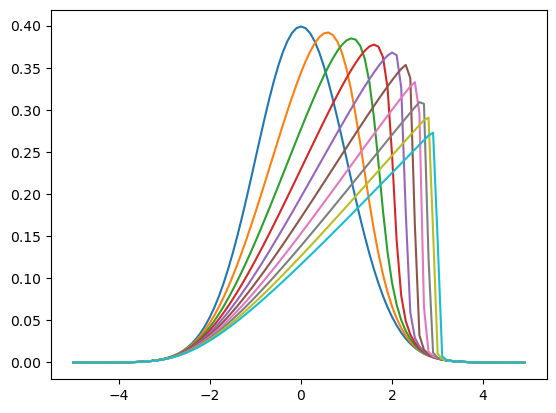

In [22]:
for i in range(0,10):
    plt.plot(x_array,u_array[i*15])

# Bonus
## with Laplacian viscosity 
aka 1D unsteady advection-diffusion?

\begin{equation}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}
\end{equation}

### Upwind for advection, central-differencing for diffusion
\begin{equation}
\underbrace{\frac{u_j^{n+1} - u_j^n}{\Delta t}}_{\frac{\partial u}{\partial t}} + \underbrace{a\frac{u_j^{n}-u_{j-1}^{n}}{\Delta x}}_{a\frac{\partial u}{\partial x}} = \underbrace{\nu \frac{u_{j-1}^n - 2u_j^n + u_{j+1}^n}{\Delta x^2}}_{\nu \frac{\partial ^2 u}{\partial x^2}}
\end{equation}

Rearrange the scheme to solve for $u_j^{n+1}$

\begin{equation}
u_j^{n+1} = \underbrace{\nu \Delta t \frac{u_{j-1}^n -2u_j^n + u_{j+1}^n}{\Delta x^2}}_{\nu \Delta t \frac{\partial ^2 u}{\partial x^2}} - \underbrace{a \Delta t \frac{u_j^n - u_{j-1}^n}{\Delta x}}_{a \Delta t \frac{\partial u}{\partial x}} + u_j^n
\end{equation}

In [6]:
# establish a value for viscosity
nu = 1*10**(-2)

In [7]:
u_array = np.expand_dims(u_init,0)
for n in range(0,100):
    u_i_np1_array = np.array([])
    for i in range(0,len(x_array)-1):
        u_n = u_array[-1]
        c = u_array[n,i] * delta_t / delta_x
        u_i_np1 = (nu * delta_t * (u_n[i-1] - 2*u_n[i] + u_n[i+1]) / (delta_x**2)) - (c * delta_t * (u_n[i] - u_n[i-1]) / delta_x) + u_n[i]
        # u_i_begin = u_i_end PERIODIC BOUNDARY CONDITIONS??
        u_i_np1_array = np.append(u_i_np1_array, u_i_np1)

    u_i_end = u_array[n-1,-1]
    u_i_np1_array = np.append(u_i_np1_array, u_i_end)
    u_array = np.vstack([u_array, u_i_np1_array])
        

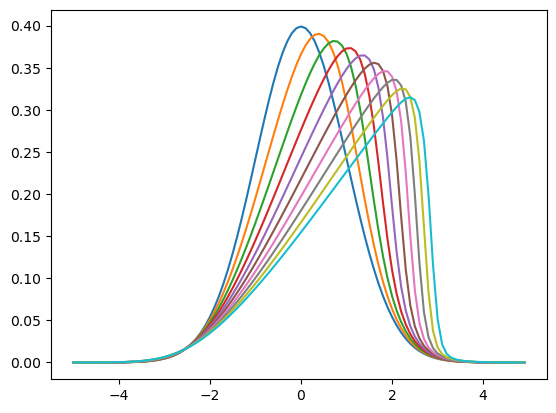

In [8]:
for i in range(0,10):
    plt.plot(x_array,u_array[i*10])

# Bonus
## compared with other advection schemes

### Inviscid 1D Burgers' Equation 
1d advection-diffusion where diffusion = 0; unsteady advection

\begin{equation}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
\end{equation}

### Explicit (time) + Central-Differencing Advection Scheme (space)
\begin{equation}
\underbrace{\frac{u_i^{n+1} - u_i^n}{\Delta t}}_{\frac{\partial u}{\partial t}} + \underbrace{u \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x}}_{a\frac{\partial u}{\partial x}} = 0
\end{equation}

Solve for $u_i^{n+1}$

\begin{align}
    u_i^{n+1} &=  - \underbrace{u \Delta t \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x}}_{u \Delta t \frac{\partial u}{\partial x}} + u_i^n \\
    u_i^{n+1} &= - c (u_{i+1}^n - u_{i-1}^n) + u_i^n
\end{align}

where $c= u \frac{\Delta t}{2\Delta x}$

In [9]:
u_array = np.expand_dims(u_init,0)
CFL_violations = 0
delta_t = 0.02
for n in range(0,100): # time
    u_i_np1_array = np.array([])
    for i in range(0,len(x_array)-1):
        u_n = u_array[-1]
        c = u_array[n,i] * delta_t / (2 * delta_x)
        if u_array[n,i] * delta_t / delta_x >= 1:
            CFL_violations +=1
        u_i_np1 = -c * (u_n[i+1] - u_n[i-1]) + u_n[i]
        u_i_np1_array = np.append(u_i_np1_array, u_i_np1)
        
    u_i_end = u_array[n-1,-1]
    u_i_np1_array = np.append(u_i_np1_array, u_i_end)
    u_array = np.vstack([u_array, u_i_np1_array])

In [10]:
CFL_violations

0

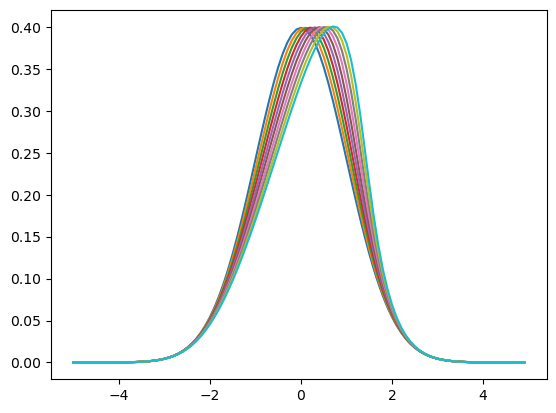

In [11]:
for i in range(0,10):
    plt.plot(x_array,u_array[i*10])

### hm, I don't really want to deal with the CFL condition violations
Use an implicit time-stepping scheme instead

### Inviscid 1D Burgers' Equation 
1d advection-diffusion where diffusion = 0; unsteady advection

\begin{equation}
    \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
\end{equation}

### Implicit (time) + Central-Differencing Advection Scheme (space)


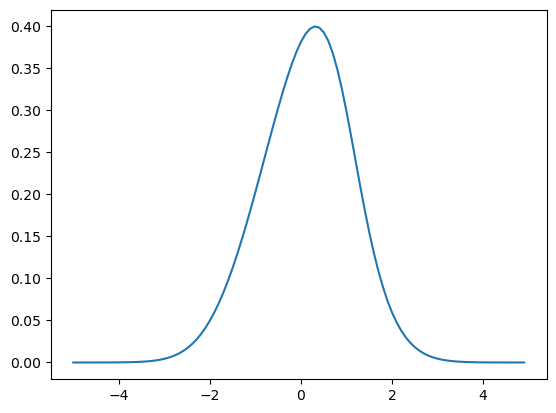

In [12]:
plt.plot(x_array, u_array[40])